In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

#Import this repos config
import os
import sys
sys.path.append("../../..")
from scripts.sacconfig import SACConfig
cfg = SACConfig()

#Import the plotting shortcuts
import scripts.plotting_helpers
from scripts.plotting_helpers import *

from scripts.period_amps import all_periods, periods
all_periods = all_periods[:10]
periods = periods[:10]

In [9]:
velocity_labels = {'par_label':r'$ \vec{V}_\parallel$ ms$^{-1}$', 'perp_label':r'$ \vec{V}_\perp$ ms$^{-1}$',
                   'phi_label':r'$ \vec{V}_\phi$ ms$^{-1}$'}
beta = True
cfg.exp_fac = 0.15
scripts.plotting_helpers.xxlim = 600

In [10]:
def add_triple_phase(ax, tube_r):
    ps = get_phase_speeds(cfg, tube_r)
    for ax0 in ax:
        add_phase_speeds(ax0, color='g', **ps)

/home/smq11sjm/.virtualenvs/vtk6/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/smq11sjm/.virtualenvs/vtk6/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


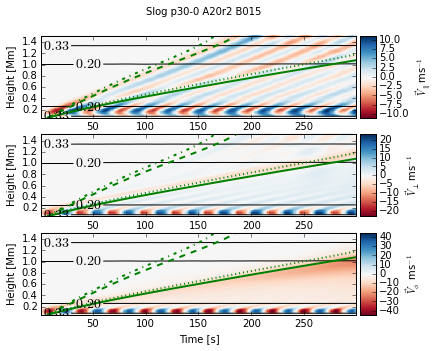

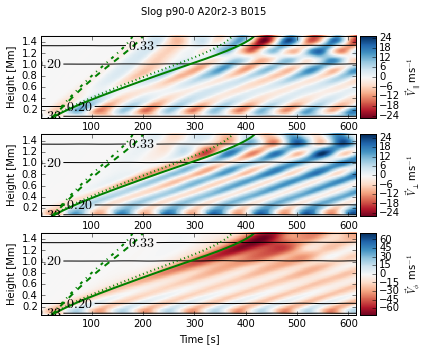

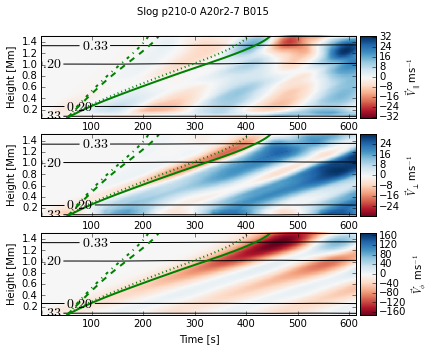

In [11]:
for paf in all_periods[::2]:
    [setattr(cfg, f, getattr(paf, f)) for f in paf._fields]
    
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6,5))
    fig.suptitle("{}".format(cfg.get_identifier().replace('_', ' ')))

    kwargs = get_single_velocity(cfg, 'r30', beta=beta)
    kwargs.update(velocity_labels)

    triple_plot(ax, **kwargs)
    add_triple_phase(ax, 'r30')